In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (7.0, 5.5)

from astropy import units
from galpy.orbit import Orbit
from FerrersPotential import FerrersPotential as FP
from galpy.potential import PlummerPotential as PP

In [13]:
%%prun -s cumulative
pmw = FP(amp = 1, a = 8*units.kpc, b = 0.35, c = 0.2375, normalize = True, omegab = 10.*units.km/units.s/units.kpc)
ps = FP(amp = 1, a = 8*units.kpc, b = 1., c = 1., normalize = True, omegab = 10.*units.km/units.s/units.kpc)
ts = np.linspace(0,34,500)
omwa = Orbit(vxvv=[1,0.25,0.7,0,0.0,0]) #[R,vR,vT,z,vz,phi]
omwb = Orbit(vxvv=[1,0.25,0.7,0,0.0,0]) #[R,vR,vT,z,vz,phi]

#omwa.integrate(ts, pmw, method = 'leapfrog')
#omwb.integrate(ts, ps, method = 'leapfrog')

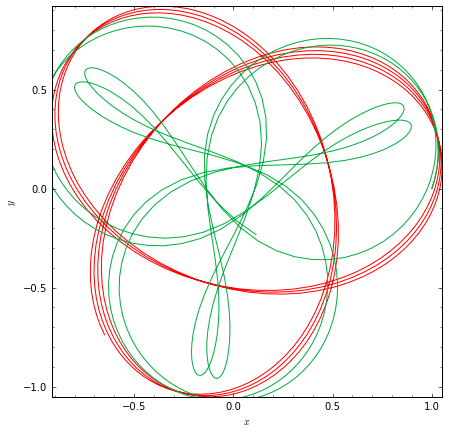

In [7]:
matplotlib.rcParams['figure.figsize'] = (7.0, 7.)
omwb.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'red')
omwa.plot(d1 = 'x', d2 = 'y', overplot = True, color = '#00AF3F')

In [192]:
ts = np.linspace(0,500,5000)
omwf = Orbit(vxvv=[1,0.25,0.6,0,0.0,0]) #[R,vR,vT,z,vz,phi]
#omwg = Orbit(vxvv=[1,0.25,0.6,0,0.0,0]) #[R,vR,vT,z,vz,phi]
#omwfd = Orbit(vxvv=[1,0.25001,0.6,0,0.0,0]) #[R,vR,vT,z,vz,phi]

omwf.integrate(ts, pmw, method = 'leapfrog')
#omwfd.integrate(ts, pmw, method = 'leapfrog')
#omwg.integrate(ts, ps, method = 'leapfrog')

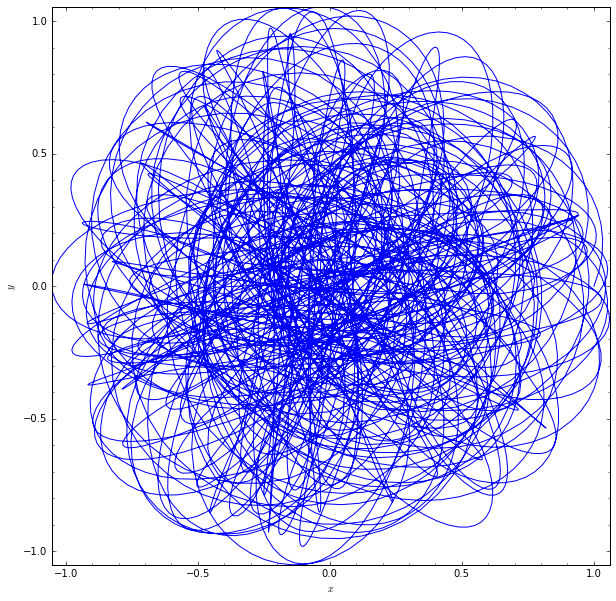

In [193]:
omwf.plot(d1 = 'x', d2 = 'y')

In [552]:
omwg.integrate(ts, ps, method = 'leapfrog')

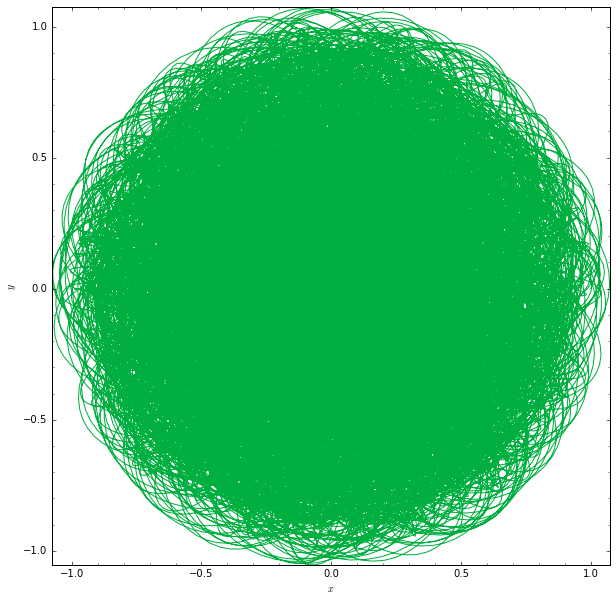

In [50]:
matplotlib.rcParams['figure.figsize'] = (10., 10.)
#omwg.plot('k.', d1 = 'R', d2 = 'vR', overplot = False, color = 'crimson')
omwf.plot('-', d1 = 'x', d2 = 'y', overplot = False, color = '#00AF3F')
#omwfd.plot('-', d1 = 'x', d2 = 'y', overplot = True, color = 'blue')

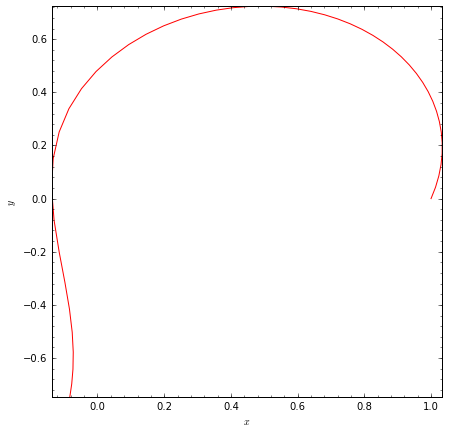

In [297]:
omwc = Orbit(vxvv=[1,0.25,0.7,0,0.0,0])
tsc = np.linspace(0,3,50)
omwc.integrate(tsc, pmw, method = 'leapfrog')
omwc.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'red')

In [298]:
print(omwc.R(tsc[-1]), omwc.vR(tsc[-1]), omwc.vT(tsc[-1]), omwc.z(tsc[-1]), omwc.vz(tsc[-1]), omwc.phi(tsc[-1]))

0.750649738829 0.740785260631 -0.0236964417435 0.0 0.0 4.60170920819


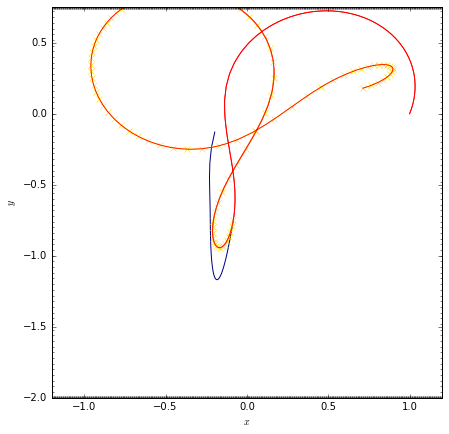

In [312]:
icon = np.array([0.750649738829, 0.740785260631, -0.0236964417435, 0.0, 0.0, 4.60170920819])
omwx = Orbit(vxvv=icon)
tsx = np.linspace(0,3,50)
omwx.integrate(tsx, pmw, method = 'leapfrog')
omwx.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'navy')
omwc.plot(d1 = 'x', d2 = 'y', overplot = True, color = 'red')
plt.xlim(-1.2,1.2)
plt.ylim(-2,0.75)

omw = Orbit(vxvv=[0.750649738829, 0.740785260631, -0.0236964417435, 0.0, 0.0, 4.60170920819])
tsc = np.linspace(3,10,100)
omw.integrate(tsc, pmw, method = 'leapfrog')
omw.plot(d1 = 'x', d2 = 'y', overplot = True, color = 'gold', marker = 'x')

omw = Orbit(vxvv=[1,0.25,0.7,0,0.0,0])
tsc = np.linspace(0,10,200)
omw.integrate(tsc, pmw, method = 'leapfrog')
omw.plot(d1 = 'x', d2 = 'y', overplot = True, color = 'red', linewidth = 0.8)

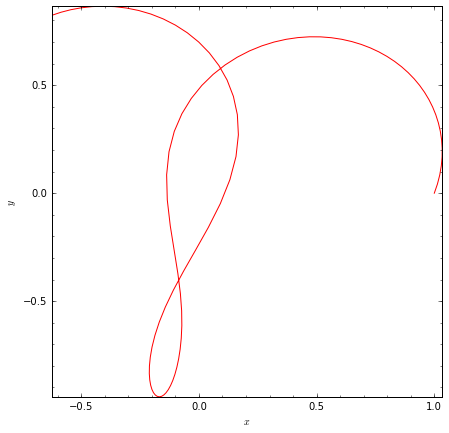

In [304]:
omwc = Orbit(vxvv=[1,0.25,0.7,0,0.0,0])
tsc = np.linspace(0,6,100)
omwc.integrate(tsc, pmw, method = 'leapfrog')
omwc.plot(d1 = 'x', d2 = 'y', overplot = False, color = 'red')

In [527]:
pp = PP(normalize = True)
op = Orbit(vxvv = [1.,.4,.93, 0.])
tsp = np.linspace(0,10,200)
op.integrate(tsp, pp,method = 'leapfrog')

In [ ]:
matplotlib.rcParams['figure.figsize'] = (7.0, 7.)
op.plot(d1 = 'x', d2 = 'y', overplot = False)

# ======================  useful functions  =========================

In [3]:
def rot(omega, t):
    temp = [[np.cos(t*omega), np.sin(t*omega)], [-np.sin(t*omega), np.cos(t*omega)]]
    return np.array(temp)

def inrotframe(x,y, ts, potential):
    xy = np.zeros([len(x),2])
    xy[:,0] = x
    xy[:,1] = y
    omega = potential.OmegaP()
    xrot, yrot = np.zeros(len(ts)), np.zeros(len(ts))
    for i in range(len(ts)):
        xrot[i],yrot[i] = np.dot(xy[i],rot(omega, ts[i]))
    return xrot, yrot

In [4]:
def allorbits(x,y, n):
    xo = [x[n*i] for i in range(int(len(x)/n))]
    xo1 = [x[n*i+1] for i in range(int(len(x)/n))]
    xo2 = [x[n*i+2] for i in range(int(len(x)/n))]
    yo = [y[n*i] for i in range(int(len(x)/n))]
    yo1 = [y[n*i+1] for i in range(int(len(x)/n))]
    yo2 = [y[n*i+2] for i in range(int(len(x)/n))]
    if n==4:
        xo3 = [x[n*i+3] for i in range(int(len(x)/n))]
        yo3 = [y[n*i+3] for i in range(int(len(x)/n))]
        return [xo,yo],[xo1,yo1],[xo2,yo2],[xo3,yo3]
    if n==5:
        xo3 = [x[n*i+3] for i in range(int(len(x)/n))]
        yo3 = [y[n*i+3] for i in range(int(len(x)/n))]
        xo4 = [x[n*i+4] for i in range(int(len(x)/n))]
        yo4 = [y[n*i+4] for i in range(int(len(x)/n))]
        return [xo,yo],[xo1,yo1],[xo2,yo2],[xo3,yo3],[xo4,yo4]
    if n==6:
        xo3 = [x[n*i+3] for i in range(int(len(x)/n))]
        yo3 = [y[n*i+3] for i in range(int(len(x)/n))]
        xo4 = [x[n*i+4] for i in range(int(len(x)/n))]
        yo4 = [y[n*i+4] for i in range(int(len(x)/n))]
        xo5 = [x[n*i+5] for i in range(int(len(x)/n))]
        yo5 = [y[n*i+5] for i in range(int(len(x)/n))]
        return [xo,yo],[xo1,yo1],[xo2,yo2],[xo3,yo3],[xo4,yo4],[xo5,yo5]
    if n==7:
        xo3 = [x[n*i+3] for i in range(int(len(x)/n))]
        yo3 = [y[n*i+3] for i in range(int(len(x)/n))]
        xo4 = [x[n*i+4] for i in range(int(len(x)/n))]
        yo4 = [y[n*i+4] for i in range(int(len(x)/n))]
        xo5 = [x[n*i+5] for i in range(int(len(x)/n))]
        yo5 = [y[n*i+5] for i in range(int(len(x)/n))]
        xo6 = [x[n*i+6] for i in range(int(len(x)/n))]
        yo6 = [y[n*i+6] for i in range(int(len(x)/n))]
        return [xo,yo],[xo1,yo1],[xo2,yo2],[xo3,yo3],[xo4,yo4],[xo5,yo5],[xo6,yo6]
    return [xo,yo],[xo1,yo1],[xo2,yo2]

# ===========================  GALI  =============================

In [5]:
""" #1
name: devolist
input:
    list of initial conditions for the orbit [R,vR,vT,z,vz,phi]; icon
    in other than first iteration also 'indev', a list which contains normalized deviation vectors from previous
    iteration to be applied to the current state of the Orbit
output:
    list of initial conditions for deviated orbit; devos
"""
def devolist(icon, indev=None):
    devos = [] 
    if indev == None:
        reldev = 0.01
        dorb = icon[:]
        for i in range(len(icon)):
            dorb = icon[:]
            dorb[i] += dorb[i]*reldev
            if icon[i] != dorb[i]: 
                devos.append(dorb)
    else:
        for i in range(len(indev)):
            dorb = icon[:]
            dorb = list(np.array(dorb)+np.array(indev[i]))
            devos.append(dorb)
    return devos
# test
print(devolist([1,0.25,0.7,0.1,5.2,0.1]))#, indev = [[1,0,0,0,0,0],[0,1,0,0,0,0],[0,2,1,0,0,0]]))

[[1.01, 0.25, 0.7, 0.1, 5.2, 0.1], [1, 0.2525, 0.7, 0.1, 5.2, 0.1], [1, 0.25, 0.707, 0.1, 5.2, 0.1], [1, 0.25, 0.7, 0.101, 5.2, 0.1], [1, 0.25, 0.7, 0.1, 5.252, 0.1], [1, 0.25, 0.7, 0.1, 5.2, 0.101]]


In [6]:
""" #2
name: evolveorbit
input:
    list of initial conditions for the orbit [R,vR,vT,z,vz,phi]; icon
    final time; tf
    potential; pot
output:
    list of orbit parameters in time tf;
"""
x = []
y = []
def evolveorbit(icon, ti, tau, pot): #############
    global x
    global y
    o = Orbit(vxvv=icon) # [R,vR,vT,z,vz,phi]
    tf = ti+tau
    ts = np.linspace(ti,tf,100)
    o.integrate(ts, pot, method = 'leapfrog')
    x.append(o.x(ts[0]))
    y.append(o.y(ts[0]))
    return [o.R(tf),o.vR(tf),o.vT(tf),o.z(tf),o.vz(tf),o.phi(tf)] #for full 3D orbit

In [7]:
""" #3
name: dvector
input:
    evolved orbit o and deviated orbit d
output:
    deviation vector w
"""
def dvector(o,d):
    return np.array(d)-np.array(o)

In [8]:
""" #4
name: matrixnorm
input:
    list of devitation vectors (np.arrays) to be normalized; wj
output:
    np.array of normalized deviation vectors; a
"""
def matrixnorm(wj):
    a = np.array(wj) # creates matrix consisting of k deviation vectors of dimension N
    k = len(a)
    for j in range(k):
        a[j] = abs(a[j] / np.linalg.norm(a[j]))
    return a

In [9]:
""" #5
name: galivalue
input:
    np.array of deviation vectors; a
output:
    value of gali at a specific time
"""
def galivalue(a):
    aT = np.transpose(a)
    s = np.linalg.svd(aT)[1] # creates array of singular values 
    return np.prod(s) # returns product of singular values ~ gali

In [10]:
"""
name: gali
input:
    initial conditions for the orbit
    renormalization time ~ timestep
    potential in which the Orbit is inspected
output:
    current value of gali, new IC for the Orbit, normalized dev. vectors in matrix for next step 
"""
def gali(o, ti, tau, potential, w=None):
    if type(w) == type(None):
        v = devolist(list(o), indev = w)#deviated orbits from the Orbit
    else:
        v = w
    newo = evolveorbit(o, ti, tau, potential) #evolves the Orbit
    wj = []
    for dorbit in v:
        temp = evolveorbit(dorbit + o*(type(w) != type(None)), ti, tau, potential) #evolves the deviated orbits to time tau
        wj.append(dvector(o=newo,d=temp)) #creates list of deviation vectors in time tau
    a = matrixnorm(wj) #normalizes the matrix containing deviation vectors in time tau
    return galivalue(a), newo, np.array(wj) #returns value of gali, new IC for the Orbit, x-normalized-x dev. vectors in matrix 

In [11]:
"""
name: galievol
input:
    initial conditions for the orbit
    renormalization time ~ timestep
    potential in which the Orbit is inspected
    maximum time Tm and small treshold value of the GALI Gm
output:
    42 (and list of GALI values during the integration) 
"""
def galievol(o,tau, potential, Tm, Gm):
    global x
    global y
    x,y = [],[]
    galis = np.zeros([1+int(Tm/tau),2]) # array large enough
    continuing = True # stopping flag
    i = 1 # counter
    w = None #initial setting
    while continuing:
        galis[i-1][1], newo, a = gali(o, tau*i, tau, potential, w)
        galis[i-1][0] = tau*i
        if galis[i-1][1]<Gm:
            print('if this code works, the orbit is chaotic')
            continuing = False
            return galis[:i-1][:]
        if i*tau > Tm:
            print('time reached treshold, orbit is regular if this code works')
            continuing = False
            return galis[:][:]
        i += 1
        o = newo
        w = a

In [ ]:
icon = np.array([1.,0.25,0.6,0.,0.,0.]) 
tau = 0.01
Tm = 100
Gm = 10**-16
results = galievol(icon, tau, pmw, Tm, Gm)

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15.0, 5.5)
plt.plot((results[:,0]), np.log10(results[:,1])) # for IC [1.,0.25,0.6,0.,0.,0.], chaotic orbit
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$log_{10}\,GALI_3$', fontsize = 15)

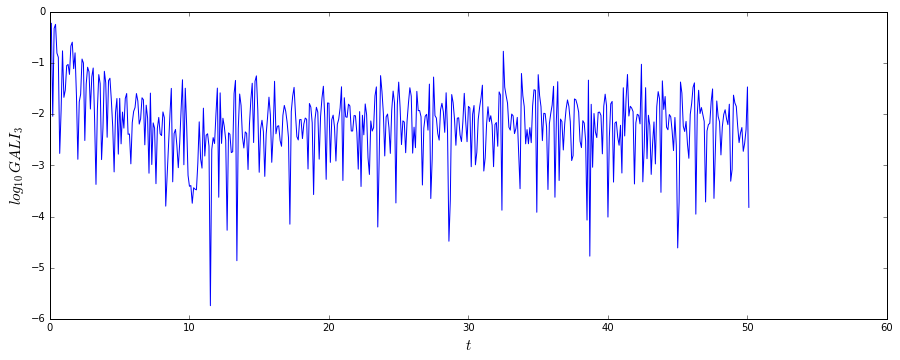

In [25]:
# DON'T TOUCH IT ANNA!
matplotlib.rcParams['figure.figsize'] = (15.0, 5.5)
plt.plot((resultsx1[:,0]), np.log10(resultsx1[:,1])) # for IC [0.5,0.3,0.3,0.,0.,np.pi/50], regular orbit
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$log_{10}\,GALI_3$', fontsize = 15)

In [21]:
orb = Orbit(vxvv = [0.5,0.3,0.3,0.,0.,np.pi/50])
timespan = np.linspace(0,5,60)
orb.integrate(timespan, pmw, method = 'leapfrog')

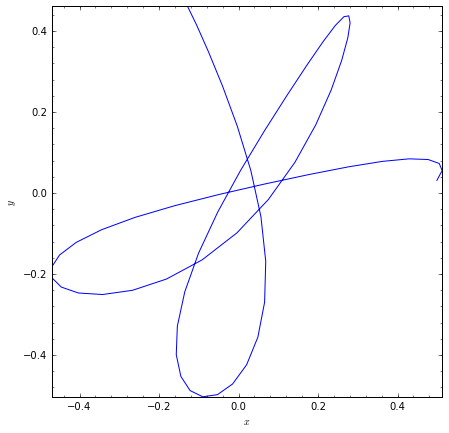

In [22]:
matplotlib.rcParams['figure.figsize'] = (7, 7)
orb.plot(d1 = 'x', d2 = 'y')
#plt.xlim(-0.5,0.5)
#plt.ylim(-0.5,0.5)

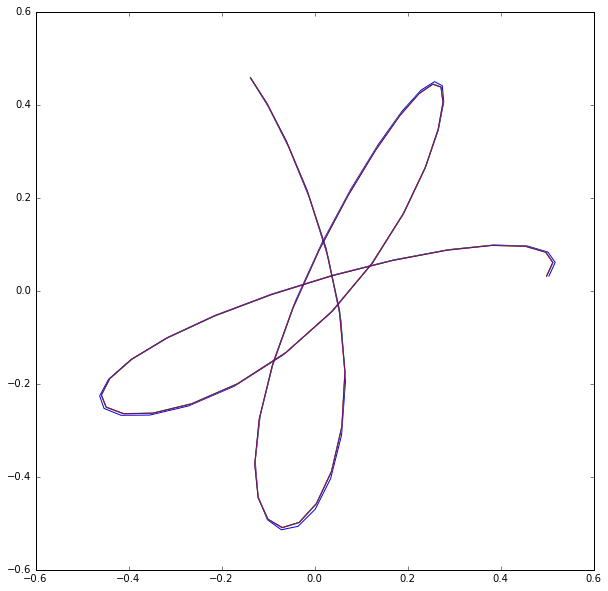

In [17]:
matplotlib.rcParams['figure.figsize'] = (10, 10)
[xo,yo],[xo1,yo1],[xo2,yo2],[xo3,yo3], [xo4,yo4] = allorbits(x,y,n=5)
plt.plot(xo[:500], yo[:500], c = 'crimson')
plt.plot(xo1[:500], yo1[:500], c = 'blue')
plt.plot(xo2[:500], yo2[:500], c = 'orange')
plt.plot(xo3[:500], yo3[:500], c = '#00AF3F')
plt.plot(xo4[:500], yo4[:500], c = 'purple')
#plt.plot(xo5[:500], yo5[:500], c = 'dodgerblue')
#plt.plot(xo6[:500], yo6[:500], c = 'gold')
#plt.xlim(-0.5,0.5)
#plt.ylim(-0.5,0.5)
plt.show()

In [162]:
for i in range(len(results)):
    if x[i]>0.45:
        print(x[i], results[i])

In [ ]:
ps = FP(amp = 1, a = 8*units.kpc, b = 1., c = 1., normalize = True, omegab = 10.*units.km/units.s/units.kpc)
icon = np.array([.2,-.6,.5, 0.,0.,0.]) # 11:54 - 
tau = 10**-2
Tm = 1000
Gm = 10**-16
results = galievol(icon, tau, ps, Tm, Gm)

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15.0, 5.5)
plt.scatter((results[:,0]), np.log10(results[:,1]))
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$log_{10}\,GALI_3$', fontsize = 15)
#plt.xlim(100,110)

In [ ]:
%%prun -s cumulative
Tm=300. # 4:28 - 4:36 for 300 pts
tau = 5*10**-2
Gm = 10**-16
pmw = FP(amp = 1, a = 8*units.kpc, b = 0.35, c = 0.2375, normalize = True, omegab = 10.*units.km/units.s/units.kpc)
icon = np.array([1.,0.25,0.6,0.,0,0])
results8 = galievol(icon, tau, pmw, Tm, Gm)

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15.0, 5.5)
plt.scatter((results8[:,0]), np.log10(results8[:,1]),marker = '+', c= 'crimson') #initial deviation 1%
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$log_{10}\,GALI_3$', fontsize = 15)
#plt.xlim(0,100)